# Exploratory Data Analysis

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import normalize, scale
from collections import Counter, defaultdict
import ast

<hr>

In [2]:
# Import data
talks = pd.read_csv("ted_main.csv")
talks.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [3]:
talks.isnull().any() # Check for null values, resuts: speaker_occupation

comments              False
description           False
duration              False
event                 False
film_date             False
languages             False
main_speaker          False
name                  False
num_speaker           False
published_date        False
ratings               False
related_talks         False
speaker_occupation     True
tags                  False
title                 False
url                   False
views                 False
dtype: bool

** Note: Dropping "URL" and "Speaker_occupation" from the dataset **

In [4]:
talks = talks.drop(["url", "speaker_occupation"], axis = 1)

<h3> Add features of interest </h3>

**Add the following new columns**
- Length of Ted Talk title
- Total number of tags
- Length of description 
- Positive Ratings: 'Funny','Beautiful','Ingenious','Courageous','Inspiring','Jaw-dropping','Fascinating'
- Moderate Ratings: 'Informative','OK','Persuasive'
- Negative Ratings: 'Longwinded','Unconvincing','Obnoxious','Confusing'
- Event type (7 new columns + event class): "is_yearlyTedConference", "is_TEDGlobal","is_TEDSalon", "is_TEDx", "is_TEDWomen", "is_TEDNYC", "is_Other"
- Top Tags: "is_culture", "is_technology", "is_science", "is_business", "is_TEDx", "is_globalIssues", "is_entertainment", "is_design", "is_psychology", "is_brain"

In [5]:
tl = [] # Title Length
for t in talks["title"]: tl.append(len(t))
talks["titleLength"] = tl

nt = [] # Number of tags
for n in talks["tags"]:
    n = eval(n)
    nt.append(len(n))
talks["numTags"] = nt

d = [] # Length of description
for s in talks["description"]:d.append(len(s))
talks["descLength"] = d

In [6]:
# All the ratings
ratings = ['Funny', 'Beautiful', 'Ingenious', 'Courageous', 'Longwinded', 'Confusing',
           'Informative', 'Fascinating', 'Unconvincing', 'Persuasive', 'Jaw-dropping', 'OK',
           'Obnoxious', 'Inspiring']

rate = []
#For this function (x) denotes the rating of interest
def parse(x):
    #Loop over all talks in dataframe
    for ll in range(len(talks)):
        #First we split on the rating of interest and subsequent splits work to isolate the rating counts
        splitting = talks['ratings'][ll].split(x)
        splitting2 = splitting[1].split(':')
        splitting3 = splitting2[1].split(" ")
        splitting4 = splitting3[1].split("}")
        #Isolate number of ratings
        rate.append(splitting4[0])
        series = pd.Series(rate)
        #Create column in dataframe for rating
        talks[x] = series
        
for rating in ratings:
    parse(rating)
    rate.clear()

In [7]:
talks[ratings] = talks[ratings].astype(int)

In [8]:
#Categorize the ratings into the three broad categories
positive = ['Funny','Beautiful','Ingenious','Courageous','Inspiring','Jaw-dropping','Fascinating']
negative = ['Longwinded','Unconvincing','Obnoxious','Confusing']
moderate = ['Informative','OK','Persuasive']

In [9]:
talks['Positive'] = talks['Funny'] + talks['Beautiful'] + talks['Ingenious'] + talks['Courageous'] + talks['Inspiring'] + talks['Jaw-dropping'] + talks['Fascinating']
talks['Moderate'] = talks['OK'] + talks["Informative"] + talks["Persuasive"]
talks['Negative'] = talks['Longwinded'] + talks['Unconvincing'] + talks['Obnoxious'] + talks['Confusing']

In [10]:
talks[['Positive','Moderate','Negative']].head()

,Positive,Moderate,Negative
0,73488,19224,1138
1,1458,914,564
2,1702,771,351
3,2647,925,156
4,17087,8223,310


In [11]:
talks[['Positive','Moderate','Negative']].describe()

,Positive,Moderate,Negative
count,2550.000000,2550.000000,2550.000000
mean,1654.662353,649.337647,132.408235
std,3320.792741,1013.887279,186.863786
min,37.000000,4.000000,0.000000
25%,468.000000,213.250000,39.000000
50%,876.000000,386.000000,77.000000
75%,1690.000000,720.750000,157.000000
max,73488.000000,19224.000000,3777.000000


** Event Type ** <br>
Can help determine if a TED talk is more likely to be viewed if they are given
at a bigger event/convention. There are a lot of different events (355) therefore 
we will condense the data into broader categories
- Year TED Conference: Main event, 5 day annual conference
- TEDx: Independent/locally hosted TED events
- TEDGlobal: Annual 5 day conference
- TEDWoman: 3 day conference
- TEDSalon: Small weekly/monthly events
- TEDNYC: Hosted in NYC
- Other
    

In [12]:
# Event type
len(talks['event'].unique())

355

In [13]:
talks["event_class"] = "Other"
#Loop over every talk and assign event category based on name of event
for ii in range(len(talks)):
    if talks['event'][ii].count('TED20') >0:
        talks['event_class'][ii] = 'Yearly TED Conference'
    elif talks['event'][ii].count('TED19') >0:
        talks['event_class'][ii] = 'Yearly TED Conference'
    elif talks['event'][ii].count('TEDx') >0:
        talks['event_class'][ii] = 'TEDx'
    elif talks['event'][ii].count('TEDGlobal') >0:
        talks['event_class'][ii] = 'TEDGlobal'
    elif talks['event'][ii].count('TEDWomen') >0:
        talks['event_class'][ii] = 'TEDWomen'
    if talks['event'][ii].count('TEDSalon') >0:
        talks['event_class'][ii] = 'TEDSalon'
    if talks['event'][ii].count('TEDNYC') >0:
        talks['event_class'][ii] = 'TEDNYC'
    else:
        pass;

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\ipyk

In [14]:
talks['event_class'].unique()

array(['Yearly TED Conference', 'TEDGlobal', 'TEDSalon', 'Other', 'TEDx',
       'TEDWomen', 'TEDNYC'], dtype=object)

In [15]:
b = talks["event_class"] == "Yearly TED Conference"
talks["is_yearlyTedConference"]= b.astype(int)

b = talks["event_class"] == "TEDGlobal"
talks["is_TEDGlobal"]= b.astype(int)

b = talks["event_class"] == "TEDSalon"
talks["is_TEDSalon"]= b.astype(int)

b = talks["event_class"] == "Other"
talks["is_Other"]= b.astype(int)

b = talks["event_class"] == "TEDx"
talks["is_TEDx"]= b.astype(int)

b = talks["event_class"] == "TEDWomen"
talks["is_TEDWomen"]= b.astype(int)

b = talks["event_class"] == "TEDNYC"
talks["is_TEDNYC"]= b.astype(int)

In [16]:
talks[["is_yearlyTedConference", "is_TEDGlobal","is_TEDSalon", "is_TEDx", "is_TEDWomen", "is_TEDNYC", "is_Other" ]].describe()

,is_yearlyTedConference,is_TEDGlobal,is_TEDSalon,is_TEDx,is_TEDWomen,is_TEDNYC,is_Other
count,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000
mean,0.383529,0.181961,0.030980,0.184706,0.037647,0.007451,0.173725
std,0.486341,0.385888,0.173299,0.388135,0.190378,0.086014,0.378948
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- 38.88% TedX
- 38.35% Yearly Ted Conference
- 18.19% TEDGlobal
- 3% TEDSalon
- 3% TedWomen
- 1.67% Other
- 0.6% TEDNYC

**Top Tags** <br>
Tags provide us a high level overview of what the TED talk is about. We picked the top 10 tags with the most views. This will help asses if a video is a popular idea in the TED community.

In [17]:
# Top Tags
def build_tag_dict(data):
    tag_dict = defaultdict(int)
    for talk_idx in range(len(data)):
        tag_lst = ast.literal_eval(data['tags'][talk_idx])
        for tag in tag_lst:
            tag_dict[tag] += data["views"][talk_idx]
    tag_count = Counter(tag_dict)
    return [tup[0] for tup in tag_count.most_common(10)]

top_tags = build_tag_dict(talks)
top_tags

['culture',
 'technology',
 'science',
 'business',
 'TEDx',
 'global issues',
 'entertainment',
 'design',
 'psychology',
 'brain']

In [18]:
def tags_conversion(data):
    rows = data.shape[0]
    tags_mtx = np.zeros((rows, 10))
    for talk_idx in range(len(data)):
        tag_lst = ast.literal_eval(data['tags'][talk_idx])
        for tag_ind in range(len(top_tags)):
            top_tag = top_tags[tag_ind]
            if top_tag in tag_lst:
                tags_mtx[talk_idx,tag_ind] = 1
    df = pd.DataFrame(tags_mtx, columns=top_tags)
    return df

In [19]:
tags_data = tags_conversion(talks)
talks[["is_culture", "is_technology", "is_science", "is_business", "is_TEDx", "is_globalIssues", "is_entertainment", "is_design", "is_psychology", "is_brain"]] = tags_data

In [20]:
talks.columns

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'tags', 'title', 'views', 'titleLength',
       'numTags', 'descLength', 'Funny', 'Beautiful', 'Ingenious',
       'Courageous', 'Longwinded', 'Confusing', 'Informative', 'Fascinating',
       'Unconvincing', 'Persuasive', 'Jaw-dropping', 'OK', 'Obnoxious',
       'Inspiring', 'Positive', 'Moderate', 'Negative', 'event_class',
       'is_yearlyTedConference', 'is_TEDGlobal', 'is_TEDSalon', 'is_Other',
       'is_TEDx', 'is_TEDWomen', 'is_TEDNYC', 'is_culture', 'is_technology',
       'is_science', 'is_business', 'is_globalIssues', 'is_entertainment',
       'is_design', 'is_psychology', 'is_brain'],
      dtype='object')

<h3> Build Correlation Matrix </h3>

In [135]:
talksC = talks.select_dtypes(include=[np.number])
talksC = talksC.drop(["Positive", "Moderate", "Negative"], axis = 1)

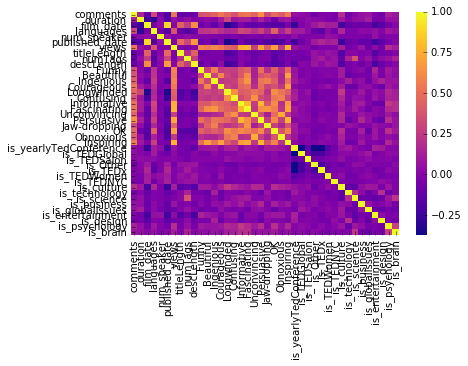

In [136]:
# Unnormalized
corr = talksC.corr();
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, cmap = "plasma")

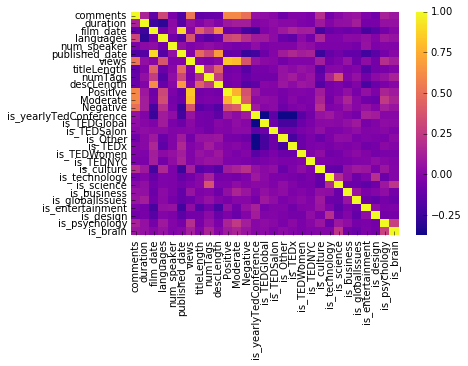

In [139]:
# REMOVE RATINGS
talksC = talks.select_dtypes(include=[np.number])
talksC = talksC.drop(['Funny', 'Beautiful', 'Ingenious', 'Courageous', 'Longwinded', 'Confusing',
           'Informative', 'Fascinating', 'Unconvincing', 'Persuasive', 'Jaw-dropping', 'OK',
           'Obnoxious', 'Inspiring'], axis = 1)
# Unnormalized
corr = talksC.corr();
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, cmap = "plasma")

In [21]:
talks.to_csv("TedTalksNewFeatures.csv")

<hr>

In [92]:


# Split data into different "popularity ranks"
rank1 = talks[talks["views"] > 10000000]  # 10 million views plus
rank2 = talks[(talks["views"] <= 10000000) & (talks["views"] > 500000)]  # 5mill - 10mil
rank3 = talks[(talks["views"] <= 500000) & (talks["views"] > 100000)]  # 1mill - 5mil
rank4 = talks[(talks["views"] <= 100000) ]  # Under 1 mil
ranked = [rank1, rank2, rank3, rank4]

In [56]:
r = 0;
print("Popularity Class, Average Views ")
for i in ranked:
    r += 1
    print(r, np.mean(i["views"]))

Popularity Class, Average Views 
1 17956545.7059
2 768292.934896
3 356883.804348
4 66533.0


In [57]:
r = 0;
print("Popularity Class, Average Comments")
for i in ranked:
    r += 1
    print(r, np.mean(i["comments"]))

Popularity Class, Average Comments
1 996.882352941
2 118.005208333
3 90.3369565217
4 35.3333333333


In [58]:
r = 0;
print("Popularity Class, Average number languages translated to ")
for i in ranked:
    r += 1
    print(r, np.mean(i["languages"]))

Popularity Class, Average number languages translated to 
1 43.4705882353
2 24.7330729167
3 18.9673913043
4 0.0


In [59]:
r = 0;
print("Popularity Class, Duration")
for i in ranked:
    r += 1
    print(r, np.mean(i["duration"]))

Popularity Class, Duration
1 963.264705882
2 830.21875
3 825.018115942
4 1591.66666667


In [60]:
r = 0;
print("Popularity Class, Title Length")
for i in ranked:
    r += 1
    print(r, np.mean(i["titleLength"]))

Popularity Class, Title Length
1 32.4705882353
2 34.69140625
3 29.9094202899
4 21.3333333333


In [118]:
r = 0;
print("Popularity Class, Number of Tags")
for i in ranked:
    r += 1
    print(r, np.mean(i["numTags"]))

Popularity Class, Number of Tags
1 6.32352941176
2 7.51692708333
3 6.6884057971
4 5.0


In [105]:
corr = talks.corr();

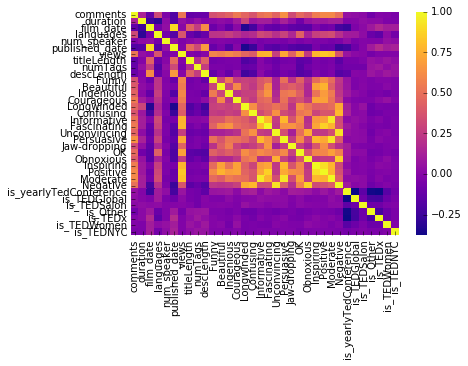

In [88]:
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, cmap = "plasma")

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


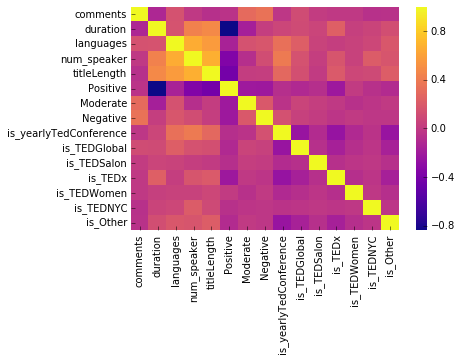

In [104]:
data_corr = talks[["comments", "duration", "languages", "num_speaker", "titleLength", "Positive", "Moderate", "Negative","is_yearlyTedConference", "is_TEDGlobal","is_TEDSalon", "is_TEDx", "is_TEDWomen", "is_TEDNYC", "is_Other" ]]
n = normalize(data_corr)
data_corr[["comments", "duration", "languages", "num_speaker", "titleLength", "Positive", "Moderate", "Negative","is_yearlyTedConference", "is_TEDGlobal","is_TEDSalon", "is_TEDx", "is_TEDWomen", "is_TEDNYC", "is_Other" ]] = n
corr = data_corr.corr();
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, cmap = "plasma")

In [101]:
data_corr

array([[  5.98176956e-02,   1.52927296e-02,   7.88285029e-04, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  1.27696534e-01,   4.70790618e-01,   2.07205697e-02, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  5.39408266e-02,   5.59418573e-01,   1.13101733e-02, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       ..., 
       [  1.51273813e-02,   9.84792522e-01,   1.51273813e-03, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  2.69343667e-02,   9.25868854e-01,   8.41698958e-04, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  1.51436407e-02,   9.82443694e-01,   1.89295509e-03, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]])

In [ ]:
# Size of audience tedX
# Group details
# Positive, Negative and Moderate
# Occupation group
# Published Date